In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df =pd.read_csv('loan.csv')

C:\Users\U385998\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.shape

(39717, 111)

### Data Exploration and Cleaning

In this section we are:

1. Removing records with loan status "Current" as they don't help in determining if a loan will default or not
2. Cleaning the data based on null values
3. Removing the customer behavior metrics that we don't have during loan application

In [5]:
# Removing loans which are currently in progress 
df=df.loc[df.loan_status !='Current']

In [7]:
### Checking null values
nulls =df.isnull().sum()
nulls

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [12]:
## Removing columns with high null rate, over 80%

null_cols =list(nulls[nulls >= 0.8*len(df)].index)
not_null_cols =[i for i in df.columns if i not in null_cols]
df =df[not_null_cols]

In [14]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [15]:
# Removing Customer behavior columns 

df.drop(columns =['delinq_2yrs','earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d','application_type'], inplace =True)

C:\Users\U385998\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
df.shape

(38577, 34)

#### Analyzing Categorical Columns

In [17]:
cat_cols =[i for i in df.columns if df[i].dtype =='object']

In [18]:
## Getting the count of unique values for the categorical columns
cat_cols_nunique= {i: df[i].nunique() for i in cat_cols}
cat_cols_nunique

{'term': 2,
 'int_rate': 370,
 'grade': 7,
 'sub_grade': 35,
 'emp_title': 28027,
 'emp_length': 11,
 'home_ownership': 5,
 'verification_status': 3,
 'issue_d': 55,
 'loan_status': 2,
 'pymnt_plan': 1,
 'url': 38577,
 'desc': 25803,
 'purpose': 14,
 'title': 19297,
 'zip_code': 822,
 'addr_state': 50,
 'initial_list_status': 1}

In [19]:
# Removing columns with only one cardinal value 
df.drop(columns =['pymnt_plan','initial_list_status'], inplace=True)

# Removing columns with very high cardinality
df.drop(columns =['emp_title','url','title','desc','zip_code'], inplace =True)

In [20]:
df.shape

(38577, 27)

In [21]:
# Data Type processing 

# Converting Interest rate to float values
df['int_rate'] =df['int_rate'].str.replace("%",'').astype('float')

# # Converting object date columns to date
df['issue_d'] =pd.to_datetime(df['issue_d'],format='%b-%y')

# Converting Term to int
df['term']=df['term'].str.replace(' months', '').astype('int')

C:\Users\U385998\AppData\Local\Temp/ipykernel_101360/1446780006.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['int_rate'] =df['int_rate'].str.replace("%",'').astype('float')
C:\Users\U385998\AppData\Local\Temp/ipykernel_101360/1446780006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d'] =pd.to_datetime(df['issue_d'],format='%b-%y')
C:\Users\U385998\AppData\Local\Temp/ipykernel_101360/1446780006.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

### Analyzing Continous Variables

In [22]:
cont_cols =[i for i in df.columns if (df[i].dtype == 'int64' or df[i].dtype =='float64') ]

In [23]:
df[cont_cols].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,13672.000,38521.000,38577.000,38577.000,38521.000,38577.000,37880.000,38538.000
mean,676378.707,842284.337,11047.025,10784.059,10222.481,11.932,322.466,68777.974,13.273,35.883,0.000,1.000,0.000,0.000,0.000,0.043,0.000
std,209263.898,264451.929,7348.442,7090.306,7022.721,3.691,208.639,64218.682,6.673,22.028,0.000,0.000,0.000,0.000,0.000,0.205,0.000
min,54734.000,70699.000,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,512033.000,661131.000,5300.000,5200.000,5000.000,8.940,165.740,40000.000,8.130,18.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,656423.000,839292.000,9600.000,9550.000,8733.440,11.710,277.860,58868.000,13.370,34.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,829146.000,1037336.000,15000.000,15000.000,14000.000,14.380,425.550,82000.000,18.560,52.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,24.400,1305.190,6000000.000,29.990,120.000,0.000,1.000,0.000,0.000,0.000,2.000,0.000


In [24]:
# Removing continous variables that have only 0 values and ids 

df.drop(columns=['id','member_id','policy_code','acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True)

C:\Users\U385998\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
df.shape

(38577, 19)

In [76]:
cat_cols_updated =[i for i in df.columns if df[i].dtype =='object']

#### Univariate Analysis - Continous Variables

In [26]:
cont_cols = [ i for i in df.columns if i in cont_cols]

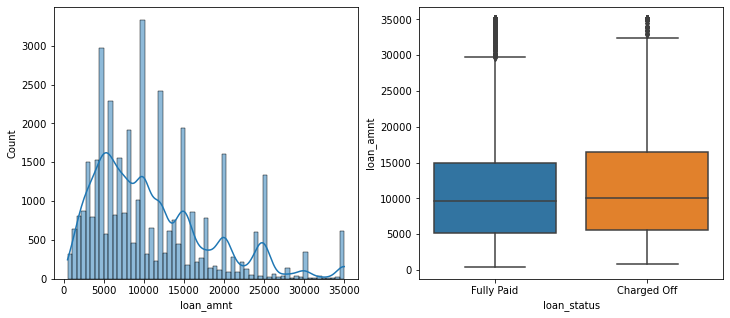

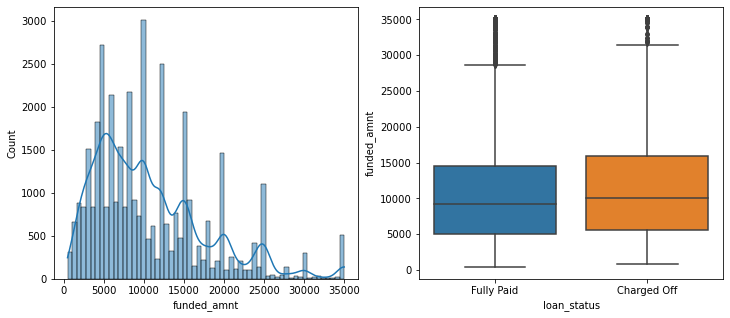

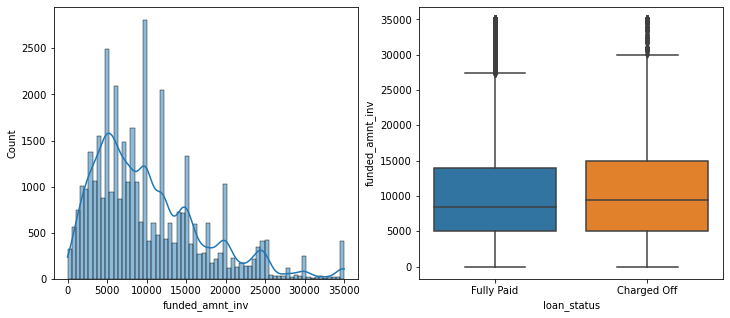

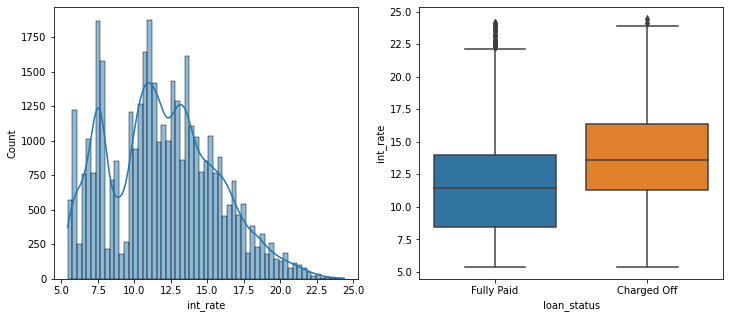

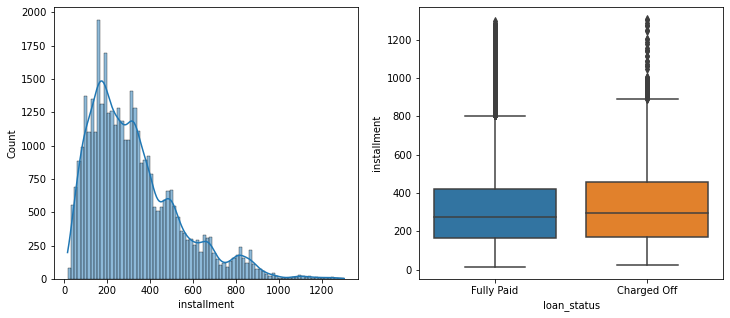

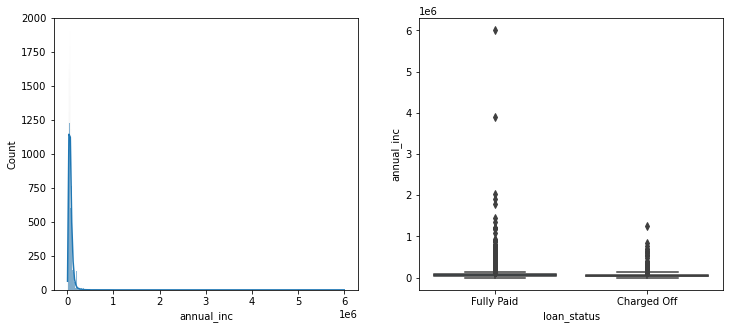

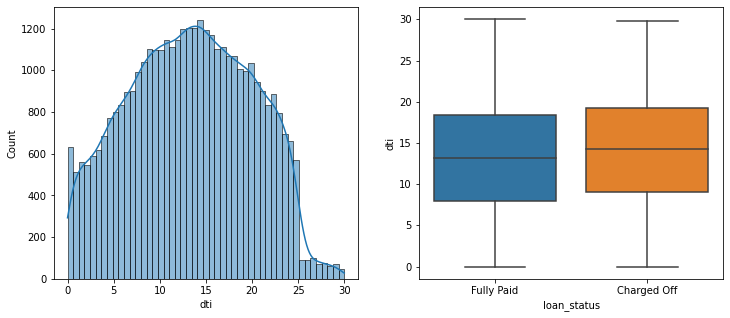

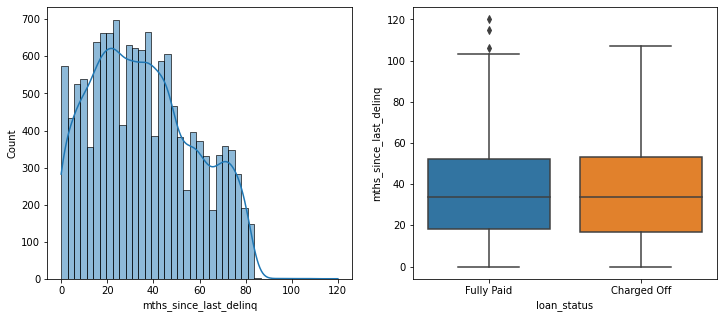

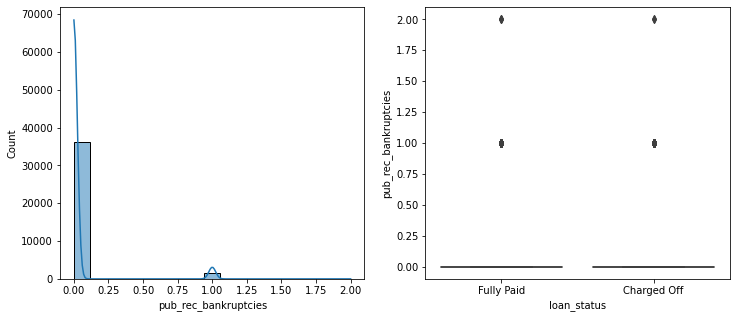

In [27]:
for i in cont_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(x=df[i], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x='loan_status',y=i,data=df)

Insights:

1. Int_rate: Charged off loans have on average higher interest rate than the fully paid loans, if the interest rate is higher than ~14%, the chances of charge off are very high
4. A lot of features are quite skewed including annual income

#### Outlier Treatment

In [78]:
# Treating Outliers in annual income
# Imputing values higher than the 99th percentile to the 99th percentile value
income_99 =df['annual_inc'].quantile(0.99)
df['annual_inc'] =df['annual_inc'].apply(lambda x: x if x<=income_99 else income_99 )

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

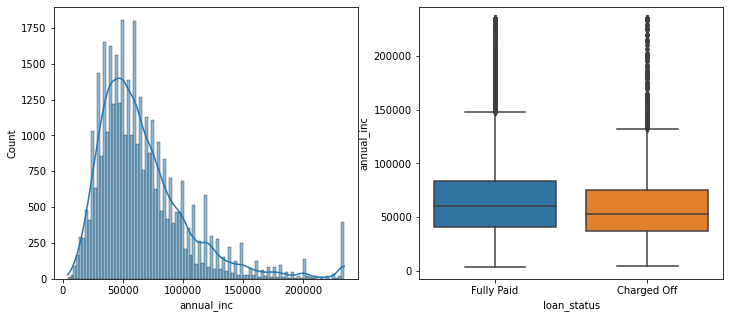

In [79]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['annual_inc'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='annual_inc',data=df)

In [80]:
# Treating Outliers in installment
# Imputing values higher than the 99th percentile to the 99th percentile value
installment_99 =df['installment'].quantile(0.99)
df['installment'] =df['installment'].apply(lambda x: x if x<=installment_99 else installment_99 )

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

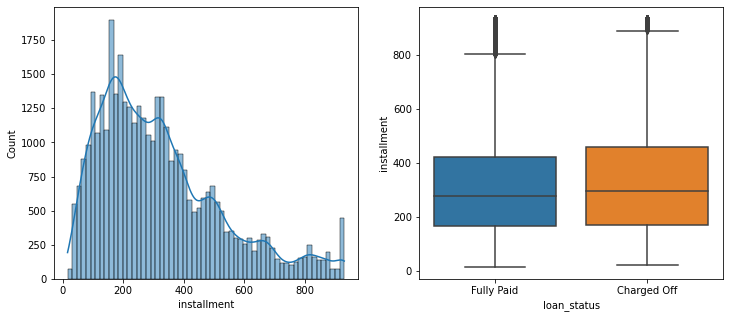

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['installment'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='installment',data=df)

### Feature Engineering

Deriving new features from the data as per the understanding

In [82]:
df['monthly_income'] =round(df['annual_inc']/12)
df['installment_monthly_income_prcnt'] =round((df['installment']/df['monthly_income'])*100,2)

<AxesSubplot:xlabel='loan_status', ylabel='installment_monthly_income_prcnt'>

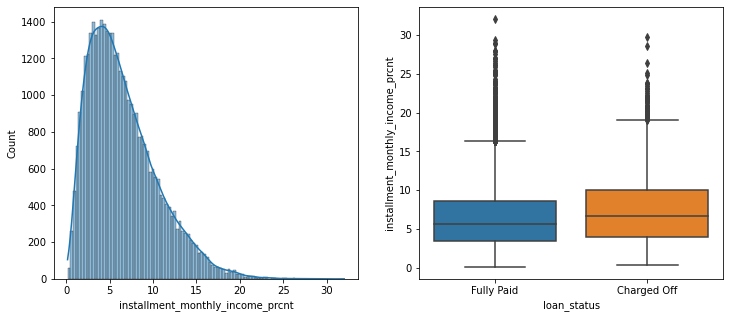

In [83]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df['installment_monthly_income_prcnt'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(x='loan_status',y='installment_monthly_income_prcnt',data=df)

Insight: If the Installment to Monthly income percentage is more than ~8%, the chances of chargeoff increases

### Bivariate and Segmented Analysis

<AxesSubplot:>

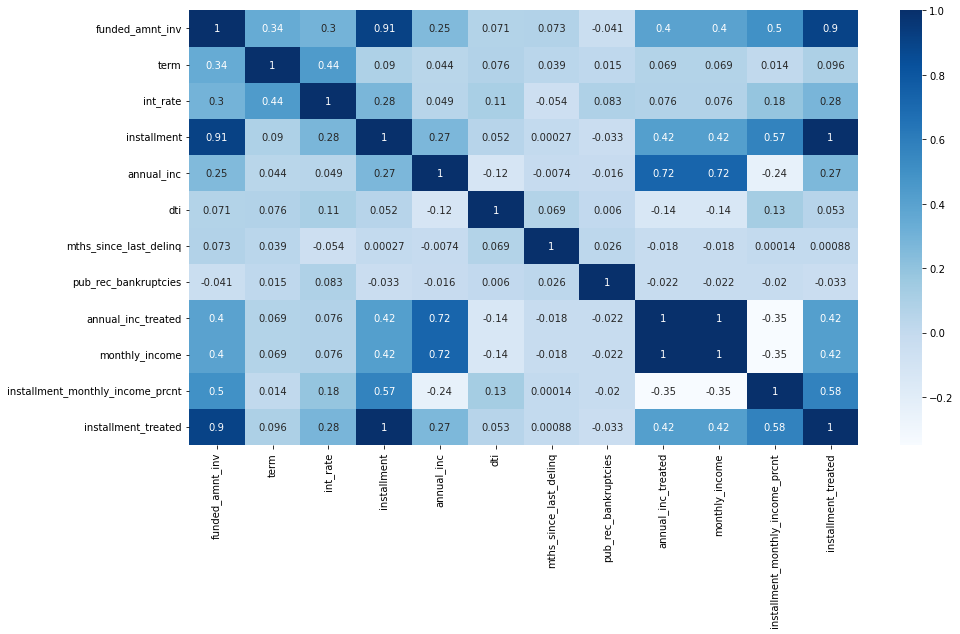

In [73]:
# Studying Correlation between features 

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap='Blues')

In [65]:
# Features having very high correlation

# loan amount- funded amount, funded amount_inv, total_payment, installment

df.drop(columns =['loan_amnt', 'funded_amnt'], inplace =True)

In [66]:
df.shape

(38577, 21)

### Segmented analysis on term

In [74]:
cont_cols_up =[i for i in df.columns if (df[i].dtype == 'int64') | (df[i].dtype == 'float64') ]

In [77]:
cat_cols_updated

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state']

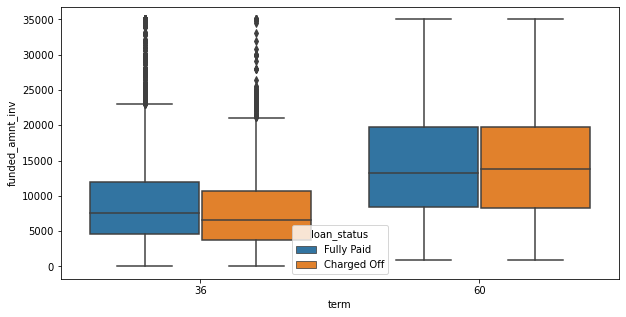

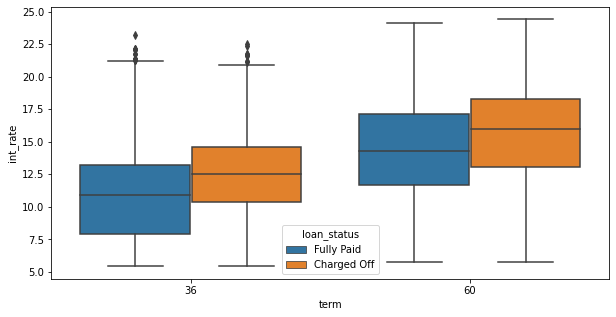

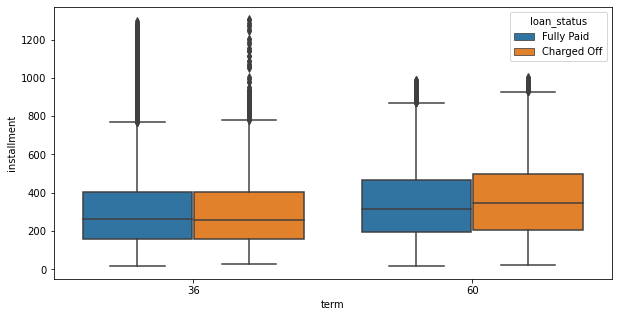

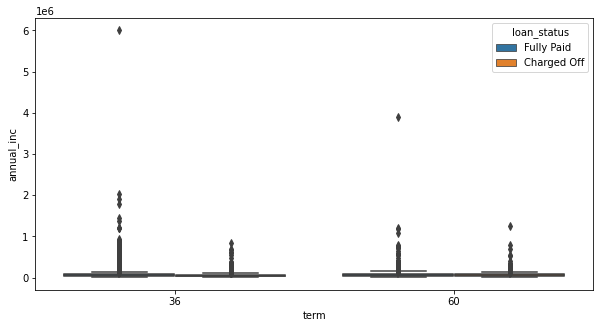

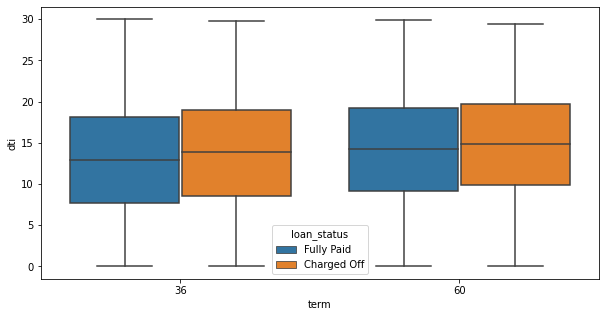

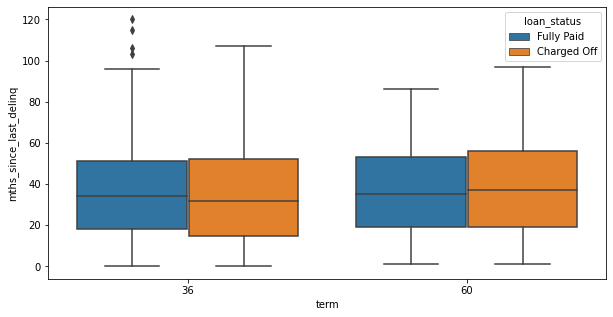

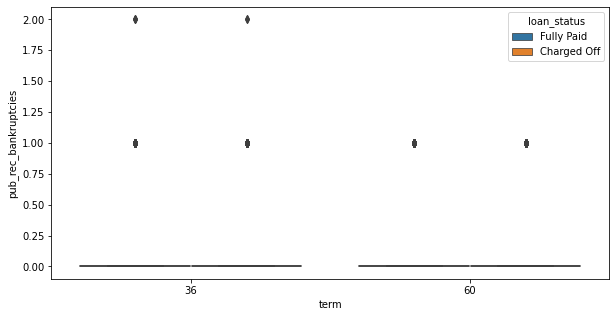

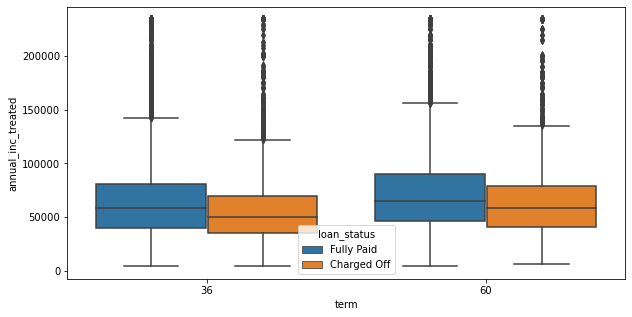

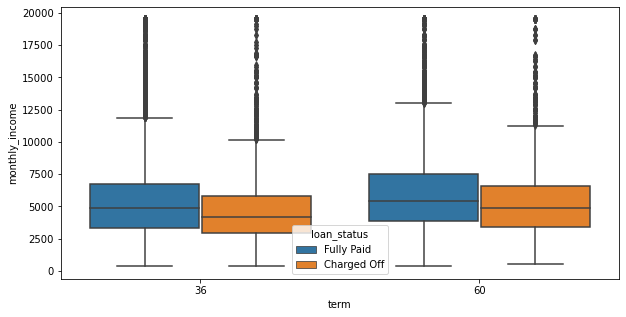

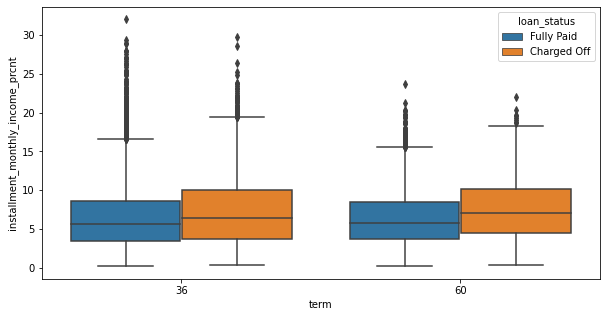

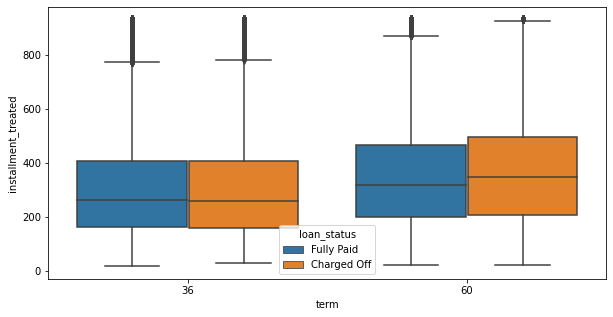

In [75]:
for i in cont_cols_up:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='term',y=i,data=df, hue='loan_status')